In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load Dataset
df = pd.read_csv('laptopPrice.csv')

# Check for missing values
print(df.isnull().sum())

# Fill missing values (e.g., using median for numerical columns and mode for categorical)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# One-Hot Encoding for Categorical Columns
df = pd.get_dummies(df, drop_first=True)



brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64


In [2]:
# Show the first few rows
print(df.head())


     Price  Number of Ratings  Number of Reviews  brand_ASUS  brand_Avita  \
0  34649.0                3.0                0.0        True        False   
1  38999.0               65.0                5.0       False        False   
2  39999.0                8.0                1.0       False        False   
3  69990.0                0.0                0.0        True        False   
4  26990.0                0.0                0.0        True        False   

   brand_DELL  brand_HP  brand_Lenovo  brand_MSI  brand_acer  ...  \
0       False     False         False      False       False  ...   
1       False     False          True      False       False  ...   
2       False     False          True      False       False  ...   
3       False     False         False      False       False  ...   
4       False     False         False      False       False  ...   

   weight_ThinNlight  warranty_2 years  warranty_3 years  \
0              False             False             False   
1 

In [3]:
print(df.columns)

Index(['Price', 'Number of Ratings', 'Number of Reviews', 'brand_ASUS',
       'brand_Avita', 'brand_DELL', 'brand_HP', 'brand_Lenovo', 'brand_MSI',
       'brand_acer', 'processor_brand_Intel', 'processor_brand_M1',
       'processor_name_Core i3', 'processor_name_Core i5',
       'processor_name_Core i7', 'processor_name_Core i9', 'processor_name_M1',
       'processor_name_Pentium Quad', 'processor_name_Ryzen 3',
       'processor_name_Ryzen 5', 'processor_name_Ryzen 7',
       'processor_name_Ryzen 9', 'processor_gnrtn_11th',
       'processor_gnrtn_12th', 'processor_gnrtn_4th', 'processor_gnrtn_7th',
       'processor_gnrtn_8th', 'processor_gnrtn_9th',
       'processor_gnrtn_Not Available', 'ram_gb_32 GB', 'ram_gb_4 GB',
       'ram_gb_8 GB', 'ram_type_DDR4', 'ram_type_DDR5', 'ram_type_LPDDR3',
       'ram_type_LPDDR4', 'ram_type_LPDDR4X', 'ssd_1024 GB', 'ssd_128 GB',
       'ssd_2048 GB', 'ssd_256 GB', 'ssd_3072 GB', 'ssd_512 GB', 'hdd_1024 GB',
       'hdd_2048 GB', 'hdd_512 GB

In [4]:
# Split the data into features and target variable
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
# Random Forest Regressor Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 22256.31599762324


In [8]:
def get_user_input():
    """
    Prompts the user to input values for each feature, including the laptop name.
    """
    print("Enter the laptop details:")

    # Get laptop name
    laptop_name = input("Enter Laptop Name: ")

    # Get the rest of the features
    ram_gb = int(input("Enter RAM size (in GB): "))
    processor_gnrtn = int(input("Enter Processor Generation: "))
    ssd = int(input("Enter SSD size (in GB): "))
    hdd = int(input("Enter HDD size (in GB): "))
  
    # Return the features as a dictionary along with the laptop name
    input_features = {
        'laptop_name': laptop_name,  # Add laptop name to the features
        'ram_gb': ram_gb,
        'processor_gnrtn': processor_gnrtn,
        'ssd': ssd,
        'hdd': hdd,
    }
    
    return input_features

def predict_price(input_features):
    """
    Predict the price of a laptop based on user input.
    """
    input_df = pd.DataFrame([input_features])
    
    # Ensure categorical variables are handled correctly
    input_df = pd.get_dummies(input_df)
    
    # Align the input features with the training features (in case new features are missing)
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    
    # Scale the features for prediction
    input_scaled = scaler.transform(input_df)
    
    # Predict the price using the trained model
    predicted_price = model.predict(input_scaled)
    return predicted_price[0]

# Get user input
user_input = get_user_input()

# Predict price based on input
predicted_price = predict_price(user_input)

# Output the result with the laptop name
print(f"\nLaptop: {user_input['laptop_name']}")
print(f"Predicted Price: ${predicted_price:.2f}")


Enter the laptop details:
Enter Laptop Name: Lenovo
Enter RAM size (in GB): 8
Enter Processor Generation: 5
Enter SSD size (in GB): 512
Enter HDD size (in GB): 120

Laptop: Lenovo
Predicted Price: $150769.85


In [10]:
from tabulate import tabulate

def load_dataset(file_path):
    """
    Loads the laptop dataset from a CSV file.
    """
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found. Please check the file path.")
        return None

def get_laptops_in_price_range(df):
    """
    Allows the user to input a price range and displays laptops within that range in tabular form.
    """
    print("Enter the price range:")
    try:
        # Take minimum and maximum price inputs
        min_price = float(input("Enter minimum price: "))
        max_price = float(input("Enter maximum price: "))
        
        # Filter the dataset for laptops within the specified price range
        filtered_laptops = df[(df['Price'] >= min_price) & (df['Price'] <= max_price)]
        
        if not filtered_laptops.empty:
            # Select columns for display
            selected_columns = ['brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 
                                'ssd', 'hdd', 'Touchscreen', 'Price']
            
            # Ensure only the required columns are displayed
            if all(col in filtered_laptops.columns for col in selected_columns):
                display_data = filtered_laptops[selected_columns]
                
                # Use tabulate for a clean tabular display
                print("\nLaptops within the specified price range:")
                print(tabulate(display_data, headers='keys', tablefmt='fancy_grid', showindex=False))
            else:
                print("Required columns are missing in the dataset.")
        else:
            print("\nNo laptops found within the specified price range.")
    except ValueError:
        print("Invalid input! Please enter numeric values for the price range.")

# Main Program
file_path = "laptopPrice.csv"  # Path to your dataset
df = load_dataset(file_path)

if df is not None:
    get_laptops_in_price_range(df)


Dataset loaded successfully!
Enter the price range:
Enter minimum price: 20000
Enter maximum price: 30000

Laptops within the specified price range:
╒═════════╤══════════════════╤═══════════════════╤══════════╤════════════╤════════╤═════════╤═══════════════╤═════════╕
│ brand   │ processor_name   │ processor_gnrtn   │ ram_gb   │ ram_type   │ ssd    │ hdd     │ Touchscreen   │   Price │
╞═════════╪══════════════════╪═══════════════════╪══════════╪════════════╪════════╪═════════╪═══════════════╪═════════╡
│ ASUS    │ Celeron Dual     │ Not Available     │ 4 GB     │ DDR4       │ 0 GB   │ 512 GB  │ No            │   26990 │
├─────────┼──────────────────┼───────────────────┼──────────┼────────────┼────────┼─────────┼───────────────┼─────────┤
│ ASUS    │ Celeron Dual     │ Not Available     │ 4 GB     │ DDR4       │ 0 GB   │ 512 GB  │ No            │   22990 │
├─────────┼──────────────────┼───────────────────┼──────────┼────────────┼────────┼─────────┼───────────────┼─────────┤
│ ASUS    │

In [11]:
def load_dataset(file_path):
    """
    Loads the laptop dataset from a CSV file.
    """
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found. Please check the file path.")
        return None

def display_best_laptops(df):
    """
    Displays the top 10 laptops with specific specifications in tabular format.
    """
    try:
        # Sort by price (assumed lower price = better deal)
        sorted_laptops = df.sort_values(by="Price", ascending=True)
        
        # Select the top 10
        best_laptops = sorted_laptops.head(10)
        
        # Select required columns
        selected_columns = [
            'brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 
            'ssd', 'hdd', 'Touchscreen', 'Price'
        ]
        
        # Check if all required columns are in the dataset
        if all(col in best_laptops.columns for col in selected_columns):
            # Use tabulate for clean tabular display
            print("\nTop 10 Best Laptops:")
            print(tabulate(best_laptops[selected_columns], headers='keys', tablefmt='fancy_grid', showindex=False))
        else:
            print("The dataset is missing required columns.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Main Program
file_path = "laptopPrice.csv"  # Path to your dataset
df = load_dataset(file_path)

if df is not None:
    display_best_laptops(df)


Dataset loaded successfully!

Top 10 Best Laptops:
╒═════════╤══════════════════╤═══════════════════╤══════════╤════════════╤═══════╤════════╤═══════════════╤═════════╕
│ brand   │ processor_name   │ processor_gnrtn   │ ram_gb   │ ram_type   │ ssd   │ hdd    │ Touchscreen   │   Price │
╞═════════╪══════════════════╪═══════════════════╪══════════╪════════════╪═══════╪════════╪═══════════════╪═════════╡
│ Lenovo  │ Celeron Dual     │ Not Available     │ 4 GB     │ LPDDR4     │ 0 GB  │ 512 GB │ No            │   16990 │
├─────────┼──────────────────┼───────────────────┼──────────┼────────────┼───────┼────────┼───────────────┼─────────┤
│ Avita   │ Celeron Dual     │ Not Available     │ 4 GB     │ DDR4       │ 0 GB  │ 512 GB │ No            │   17490 │
├─────────┼──────────────────┼───────────────────┼──────────┼────────────┼───────┼────────┼───────────────┼─────────┤
│ ASUS    │ Celeron Dual     │ Not Available     │ 4 GB     │ LPDDR4     │ 0 GB  │ 512 GB │ No            │   17990 │
├────

In [12]:
def load_dataset(file_path):
    """
    Loads the laptop dataset from a CSV file.
    """
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found. Please check the file path.")
        return None

def display_worst_laptops(df):
    """
    Displays the 10 worst laptops with specific specifications in tabular format.
    """
    try:
        # Sort by price (highest price = least affordable = worst for value)
        sorted_laptops = df.sort_values(by="Price", ascending=False)
        
        # Select the top 10 (highest priced)
        worst_laptops = sorted_laptops.head(10)
        
        # Select required columns
        selected_columns = [
            'brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 
            'ssd', 'hdd', 'Touchscreen', 'Price'
        ]
        
        # Check if all required columns are in the dataset
        if all(col in worst_laptops.columns for col in selected_columns):
            # Use tabulate for clean tabular display
            print("\nTop 10 Worst Laptops (Highest Priced):")
            print(tabulate(worst_laptops[selected_columns], headers='keys', tablefmt='fancy_grid', showindex=False))
        else:
            print("The dataset is missing required columns.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Main Program
file_path = "laptopPrice.csv"  # Path to your dataset
df = load_dataset(file_path)

if df is not None:
    display_worst_laptops(df)


Dataset loaded successfully!

Top 10 Worst Laptops (Highest Priced):
╒═════════╤══════════════════╤═══════════════════╤══════════╤════════════╤═════════╤════════╤═══════════════╤═════════╕
│ brand   │ processor_name   │ processor_gnrtn   │ ram_gb   │ ram_type   │ ssd     │ hdd    │ Touchscreen   │   Price │
╞═════════╪══════════════════╪═══════════════════╪══════════╪════════════╪═════════╪════════╪═══════════════╪═════════╡
│ ASUS    │ Core i9          │ 11th              │ 16 GB    │ DDR4       │ 3072 GB │ 0 GB   │ No            │  441990 │
├─────────┼──────────────────┼───────────────────┼──────────┼────────────┼─────────┼────────┼───────────────┼─────────┤
│ APPLE   │ M1               │ 10th              │ 32 GB    │ DDR4       │ 1024 GB │ 0 GB   │ No            │  309990 │
├─────────┼──────────────────┼───────────────────┼──────────┼────────────┼─────────┼────────┼───────────────┼─────────┤
│ ASUS    │ Core i9          │ 12th              │ 16 GB    │ DDR5       │ 1024 GB │ 0 GB  

In [13]:
def load_dataset(file_path):
    """
    Loads the laptop dataset from a CSV file.
    """
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found. Please check the file path.")
        return None

def search_by_laptop_name(df, laptop_name):
    """
    Filters the dataset to show details of laptops with the specified name.
    """
    try:
        # Filter the dataset for the given laptop name
        filtered_laptops = df[df['brand'].str.contains(laptop_name, case=False, na=False)]
        
        if not filtered_laptops.empty:
            # Select specific columns
            selected_columns = [
                'brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 
                'ssd', 'hdd', 'Touchscreen', 'Price'
            ]
            
            # Ensure the selected columns exist
            if all(col in filtered_laptops.columns for col in selected_columns):
                print(f"\nLaptops matching the name '{laptop_name}':")
                print(tabulate(filtered_laptops[selected_columns], headers='keys', tablefmt='fancy_grid', showindex=False))
            else:
                print("The dataset is missing some required columns.")
        else:
            print(f"No laptops found matching the name '{laptop_name}'.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Main Program
file_path = "laptopPrice.csv"  # Path to your dataset
df = load_dataset(file_path)

if df is not None:
    laptop_name = input("Enter the laptop name (or brand) to search: ")
    search_by_laptop_name(df, laptop_name)


Dataset loaded successfully!
Enter the laptop name (or brand) to search: Lenovo

Laptops matching the name 'Lenovo':
╒═════════╤══════════════════╤═══════════════════╤══════════╤════════════╤═════════╤═════════╤═══════════════╤═════════╕
│ brand   │ processor_name   │ processor_gnrtn   │ ram_gb   │ ram_type   │ ssd     │ hdd     │ Touchscreen   │   Price │
╞═════════╪══════════════════╪═══════════════════╪══════════╪════════════╪═════════╪═════════╪═══════════════╪═════════╡
│ Lenovo  │ Core i3          │ 10th              │ 4 GB     │ DDR4       │ 0 GB    │ 1024 GB │ No            │   38999 │
├─────────┼──────────────────┼───────────────────┼──────────┼────────────┼─────────┼─────────┼───────────────┼─────────┤
│ Lenovo  │ Core i3          │ 10th              │ 4 GB     │ DDR4       │ 0 GB    │ 1024 GB │ No            │   39999 │
├─────────┼──────────────────┼───────────────────┼──────────┼────────────┼─────────┼─────────┼───────────────┼─────────┤
│ Lenovo  │ Core i5          │ 10th 

Dataset loaded successfully!


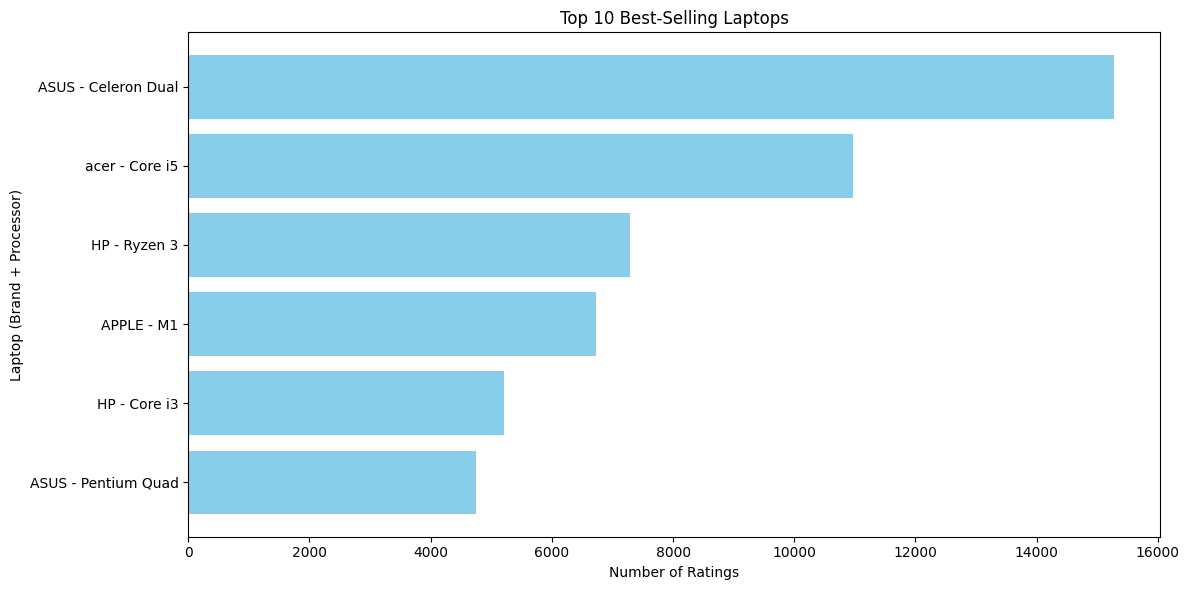

In [14]:
def load_dataset(file_path):
    """
    Loads the laptop dataset from a CSV file.
    """
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found. Please check the file path.")
        return None

def visualize_best_selling_laptops(df, top_n=10):
    """
    Visualizes the best-selling laptops based on the number of ratings.
    """
    try:
        # Sort laptops by 'Number of Ratings' in descending order
        best_selling = df.sort_values(by="Number of Ratings", ascending=False).head(top_n)
        
        # Plot a bar chart
        plt.figure(figsize=(12, 6))
        plt.barh(best_selling['brand'] + " - " + best_selling['processor_name'], 
                 best_selling['Number of Ratings'], color='skyblue')
        plt.xlabel("Number of Ratings")
        plt.ylabel("Laptop (Brand + Processor)")
        plt.title(f"Top {top_n} Best-Selling Laptops")
        plt.gca().invert_yaxis()  # Invert the y-axis for better readability
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Main Program
file_path = "laptopPrice.csv"  # Path to your dataset
df = load_dataset(file_path)

if df is not None:
    visualize_best_selling_laptops(df, top_n=10)  # Visualize top 10 best-selling laptops


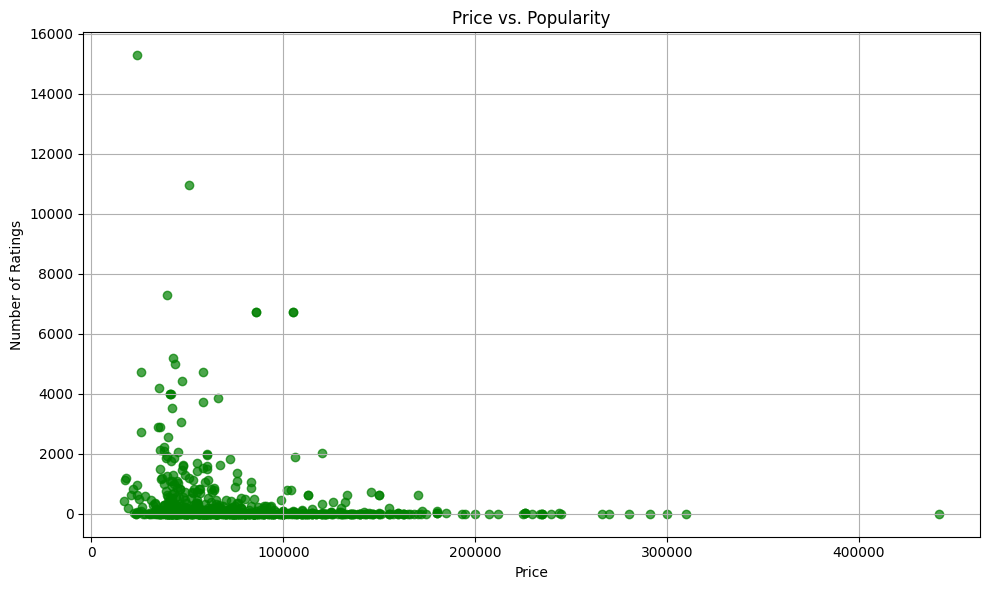

In [24]:
def visualize_price_vs_popularity(df):
    """
    Visualizes the relationship between laptop price and popularity (number of ratings).
    """
    try:
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Price'], df['Number of Ratings'], alpha=0.7, color='green')
        plt.xlabel("Price")
        plt.ylabel("Number of Ratings")
        plt.title("Price vs. Popularity")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")
visualize_price_vs_popularity(df)

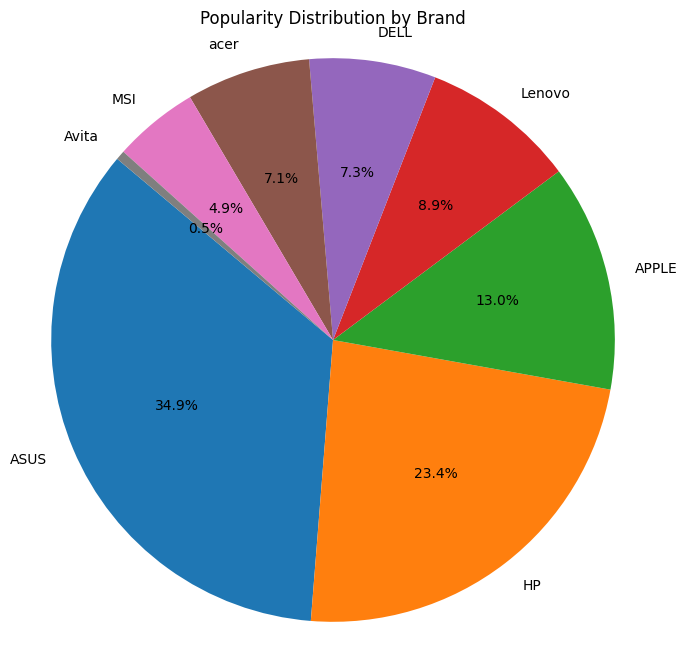

In [25]:
def visualize_brand_popularity(df):
    """
    Visualizes the distribution of laptop popularity across brands.
    """
    try:
        # Group by brand and sum the number of ratings
        brand_popularity = df.groupby('brand')['Number of Ratings'].sum().sort_values(ascending=False)
        
        # Plot a pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(brand_popularity, labels=brand_popularity.index, autopct='%1.1f%%', startangle=140)
        plt.title("Popularity Distribution by Brand")
        plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")
visualize_brand_popularity(df)

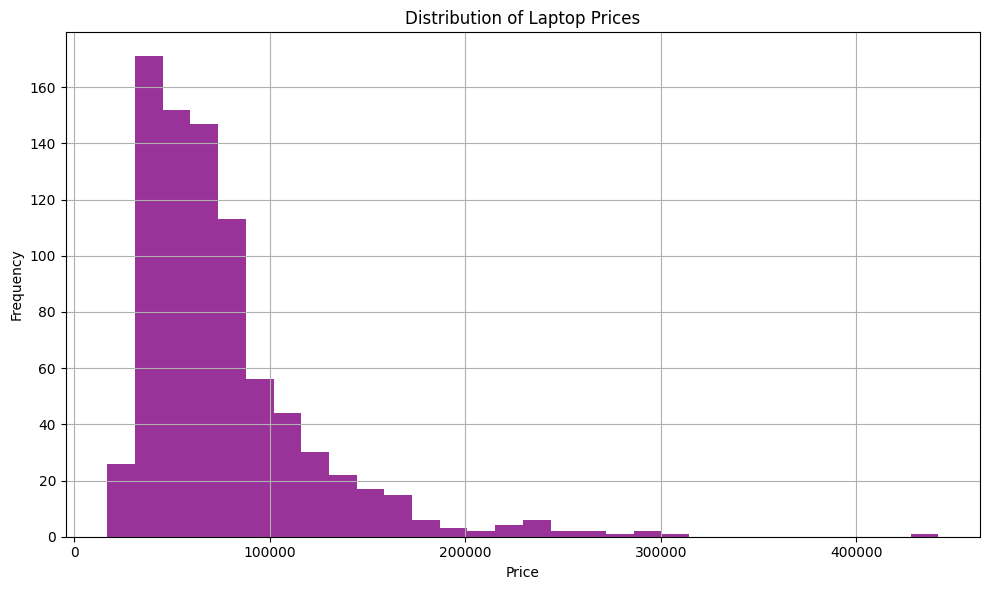

In [26]:
def visualize_price_distribution(df):
    """
    Visualizes the distribution of laptop prices.
    """
    try:
        plt.figure(figsize=(10, 6))
        plt.hist(df['Price'], bins=30, color='purple', alpha=0.8)
        plt.xlabel("Price")
        plt.ylabel("Frequency")
        plt.title("Distribution of Laptop Prices")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")
visualize_price_distribution(df)

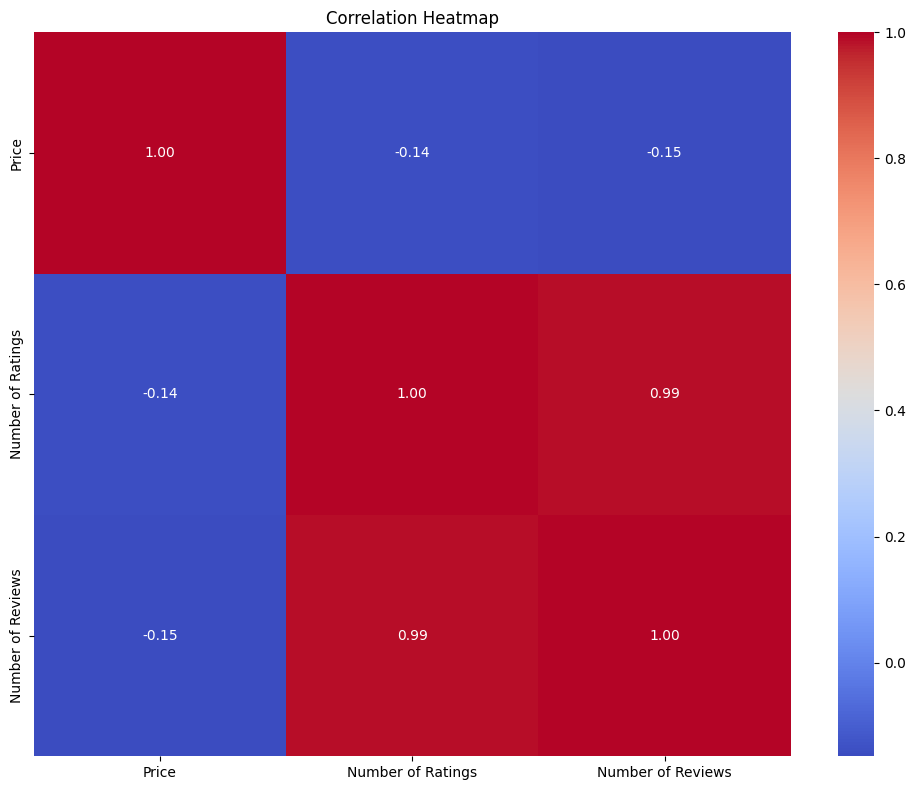

In [27]:
import seaborn as sns

def visualize_correlation_heatmap(df):
    """
    Visualizes correlations between numerical features in the dataset.
    """
    try:
        plt.figure(figsize=(10, 8))
        numerical_features = df.select_dtypes(include=['int64', 'float64'])
        correlation_matrix = numerical_features.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")
visualize_correlation_heatmap(df)

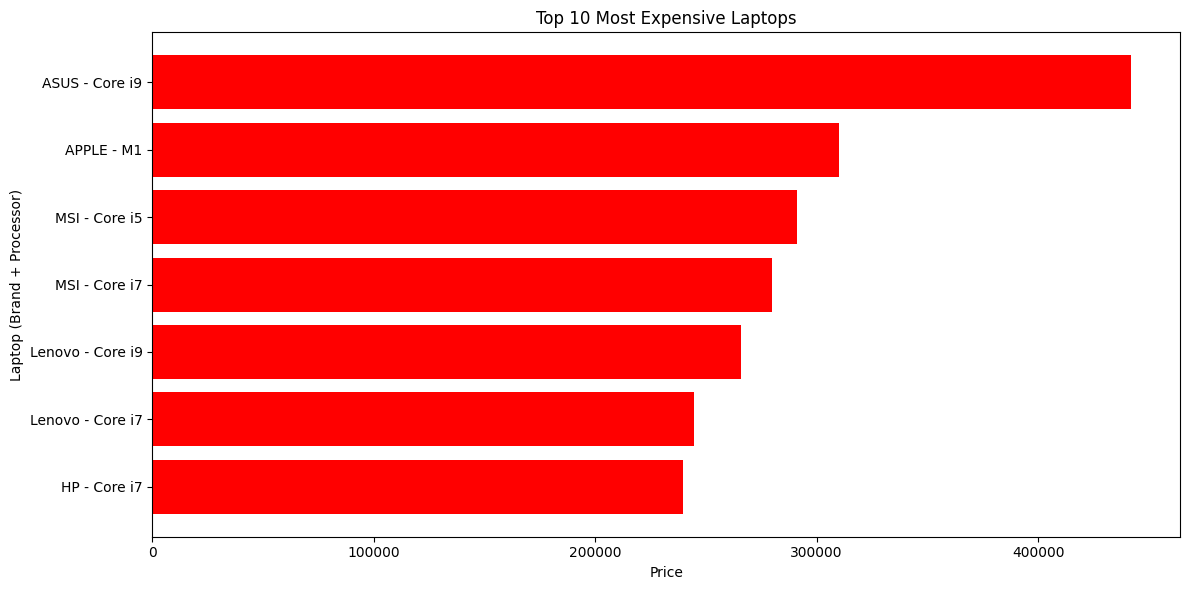

In [28]:
def visualize_most_expensive_laptops(df, top_n=10):
    """
    Visualizes the most expensive laptops in the dataset.
    """
    try:
        expensive_laptops = df.sort_values(by="Price", ascending=False).head(top_n)
        
        plt.figure(figsize=(12, 6))
        plt.barh(expensive_laptops['brand'] + " - " + expensive_laptops['processor_name'], 
                 expensive_laptops['Price'], color='red')
        plt.xlabel("Price")
        plt.ylabel("Laptop (Brand + Processor)")
        plt.title(f"Top {top_n} Most Expensive Laptops")
        plt.gca().invert_yaxis()  # Invert the y-axis for better readability
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")
visualize_most_expensive_laptops(df, top_n=10)